Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

Reading csv's

In [2]:
test = pd.read_csv("CSV/data_test.csv")
train = pd.read_csv("CSV/data_train.csv")
print(test.shape)
print(train.shape)

(16281, 15)
(32561, 15)


Merging csv's

In [3]:
df = pd.concat([test, train])
print(df.shape)
print(df.columns)

(48842, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


Performing train_test_split

In [4]:
y_train = train["income"].values
X_train_unnormalized = train.drop(["income"], axis=1).values

y_test = test["income"].values
X_test_unnormalized = test.drop(["income"], axis=1).values

# Checking baseline accuracy with RandomForestClassifier-model

Score on training set: 0.9999692884125181
Score on test set: 0.8529574350469873

cross_validation_score:
Accuracy: 85.80% (+/- 0.42)

classification_report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281


matthews_corrcoef:
0.5714334077189942


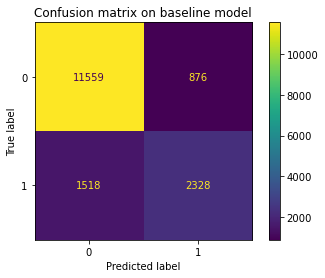

In [5]:
forest_baseline = RandomForestClassifier(random_state=42).fit(X_train_unnormalized, y_train)
predicting_scoring_model(forest_baseline, X_train_unnormalized,
                                         y_train, X_test_unnormalized,
                                         y_test, "baseline model")

# Modeling with normalized data.
Scaling the data

In [6]:
X_train = normalizing_array(X_train_unnormalized)
X_test = normalizing_array(X_test_unnormalized)

Score on training set: 0.8013267405792205
Score on test set: 0.7963270069406057

cross_validation_score:
Accuracy: 79.66% (+/- 0.81)

classification_report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     12435
           1       0.88      0.16      0.27      3846

    accuracy                           0.80     16281
   macro avg       0.84      0.58      0.58     16281
weighted avg       0.81      0.80      0.74     16281


matthews_corrcoef:
0.3207212304413108


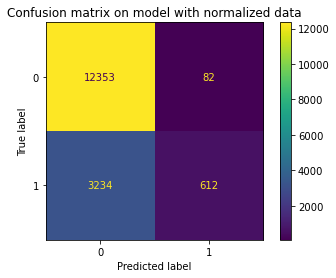

In [7]:
forest_normal = RandomForestClassifier(random_state=42).fit(X_train, y_train)
predicting_scoring_model(forest_normal, X_train, y_train, X_test,
                                         y_test, "model with normalized data")

# Building on the baseline model with RandomizedSearchCV

In [8]:
param_grid = {
    "n_estimators": [100,200,300,400,500],
    "max_features": ["auto","sqrt","log2"],
    "max_depth": [None, 3,6,9],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False],
    "min_samples_split": [2,5,9]
}
forest_cv = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, random_state=42)
forest_cv.fit(X_train_unnormalized, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 6, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

Score on training set: 0.9999692884125181
Score on test set: 0.8549229162827836

cross_validation_score:
Accuracy: 85.83% (+/- 0.43)

classification_report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.73      0.61      0.67      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.79     16281
weighted avg       0.85      0.85      0.85     16281


matthews_corrcoef:
0.5779838992694128


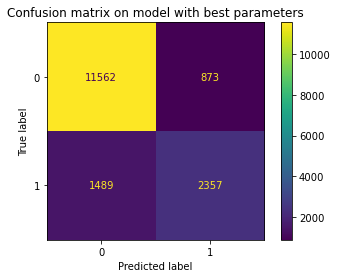

In [9]:
forest_cv = forest_cv.best_estimator_
predicting_scoring_model(forest_cv, X_train_unnormalized, y_train, X_test_unnormalized, y_test, "model with best parameters")

# Trying with own train_test_split
Splitting the full dataset in train(70%) and test(30%)

In [10]:
y = df["income"].values
X = df.drop(["income"], axis=1).values
X_train_splitted, X_test_splitted, y_train_splitted, y_test_splitted = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

Score on training set: 0.9999415016525783
Score on test set: 0.858459018630997

cross_validation_score:
Accuracy: 85.68% (+/- 0.33)

classification_report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11147
           1       0.74      0.62      0.68      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653


matthews_corrcoef:
0.5924540846074983


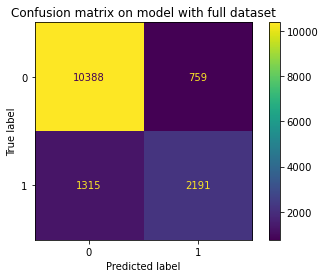

In [11]:
forest_full = RandomForestClassifier(random_state=42)
forest_full.fit(X_train_splitted, y_train_splitted)
predicting_scoring_model(forest_full, X_train_splitted, y_train_splitted, X_test_splitted,
                                         y_test_splitted, "model with full dataset")

# Searching for best parameters using RandomizedSearchCV, on own train_test_split

In [12]:
forest_full_best = RandomizedSearchCV(forest_full, param_grid, cv=5, random_state=42)
forest_full_best.fit(X_train_splitted, y_train_splitted)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 6, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

Score on training set: 0.9999415016525783
Score on test set: 0.8587320002729817

cross_validation_score:
Accuracy: 85.78% (+/- 0.29)

classification_report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11147
           1       0.75      0.62      0.68      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653


matthews_corrcoef:
0.5923965629599811


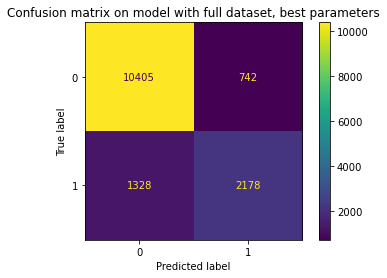

In [13]:
# No improvement
forest_full_best = forest_full_best.best_estimator_
predicting_scoring_model(forest_full_best, X_train_splitted, y_train_splitted, X_test_splitted,
                                         y_test_splitted, "model with full dataset, best parameters")

# Making the classes in the dataset evenly distributed.

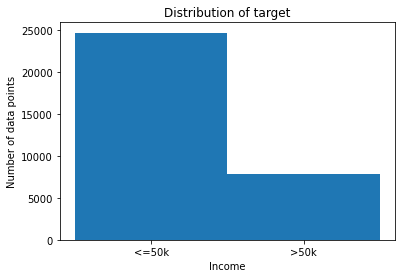

In [20]:
plt.hist(train.income, bins=np.arange(-0.5,2))
plt.xticks([0,1],labels=["<=50k",">50k"])
plt.title("Distribution of target")
plt.xlabel("Income")
plt.ylabel("Number of data points")
plt.savefig("Visuals/Distribution_classes.png")

In [23]:
print(train.income.value_counts())
train_only_1 = train[train["income"] == 1]
df_even_classes = pd.concat([train, train_only_1, train_only_1])
print(df_even_classes.income.value_counts())
print(df_even_classes.shape)

0    24720
1     7841
Name: income, dtype: int64
0    24720
1    23523
Name: income, dtype: int64
(48243, 15)


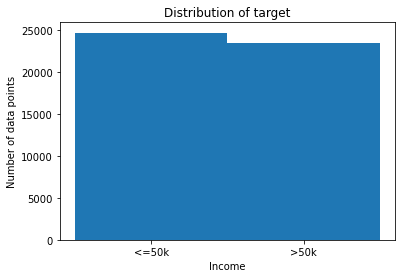

In [24]:
plt.hist(df_even_classes.income, bins=np.arange(-0.5,2))
plt.xticks([0,1],labels=["<=50k",">50k"])
plt.title("Distribution of target")
plt.xlabel("Income")
plt.ylabel("Number of data points")
plt.savefig("Visuals/Even_distribution_classes.png")

Splitting into train and test

In [25]:
y_even = df_even_classes["income"].values
X_even = df_even_classes.drop(["income"], axis=1).values
X_train_even, X_test_even, y_train_even, y_test_even = train_test_split(X_even,y_even, test_size=0.2, random_state=42, stratify=y_even)

Checking model scores

In [26]:
forest_even_classes = RandomForestClassifier(random_state=42)
forest_even_classes.fit(X_train_even, y_train_even)

RandomForestClassifier(random_state=42)

Score on training set: 0.9999740892366689
Score on test set: 0.8434371353110989

cross_validation_score:
Accuracy: 91.83% (+/- 0.54)

classification_report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     12435
           1       0.65      0.72      0.69      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.80      0.79     16281
weighted avg       0.85      0.84      0.85     16281


matthews_corrcoef:
0.582809604318849


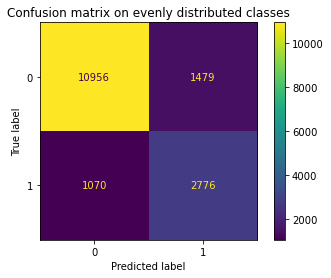

In [27]:
predicting_scoring_model(forest_even_classes,X_train_even,y_train_even,X_test_unnormalized,
                         y_test, "evenly distributed classes")